# Intro to Neural Networks

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Background

Neural Networks have been around for a while. They are over 70 years old, dating back to  their proposal in 1944 by Warren McCullough and Walter Pitts. These first proposed neural nets had thresholds and weights, but no layers and no specific training mechanisms.

The "Perceptron" the first trainable neural network was created by Frank Rosenblatt in 1957. It consisted of a single layer with adjustable weights in the middle of input and output layers.



![peceptron](img/nn-diagram.png)

## Inspiration from Actual Neurons

The composition of neural networks is loosly based on a neuron.

![neuron](img/neuron.png)

This is a loose analogy, but can be a helpful **mneumonic** (If I don't stress that this is a mneumonic, my sister might put out a hit on me). The inputs to our node are like inputs to our neurons.  They are either direct sensory information (our features) or input from other axons (nodes passing information to other nodes).  The body of our neuron (soma) is where the signals of the dentrites are summed together, which is loosely analogous to our **collector function**. If the summed signal is large enough (our **activation function**), they trigger an action potential which travels down the axon to be passed as output to other dentrites ([wikipedia neuron article](https://en.wikipedia.org/wiki/Neuron)). 

# Forward Propogation

Let's first look at **forward propogation** on the level of the perceptron.

We will use the built in dataset of handwritten numbers from sklearn, which comes from the UCI Machine Learning collection [digits source](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Each record is a 8 by 8 bit image of a handwritten number between 0 and 9. Each pixel value (a number between 0 and 16) represents the relative brightness of the pixel. 

In [3]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)
eight_by_eight_image = digits.images[0]

It is similar to the famous [**MNIST**](http://yann.lecun.com/exdb/mnist/index.html) dataset which is sometimes referred to the "hello world" of computer vision [source](https://www.kaggle.com/c/digit-recognizer).  

With one input of pixels from a number, our input/output process looks like so:

In [4]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
eight_by_eight_image = digits.images[0]

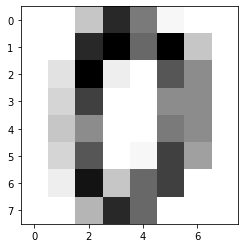

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(eight_by_eight_image, cmap='Greys')

In [6]:
# look at the matrix below and make sure you see how the large numbers 
# correspond to darker shades in the image above
eight_by_eight_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

When passing the data into our perceptron, we will flatten the image into a 64x1 array.

In [7]:
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)


In [8]:
flat_image.shape

(64, 1)

Our weights vector will have the same number of weights as pixels

![weights](img/log-reg-nn-ex-w.png)

We will instantiate our weight with small random numbers.

### Question: If we think ahead for a moment to a multilayer perceptron, take a guess as to what problem would occur if we happen if we set all of the weights to zero?

In [9]:
# Answer

In [12]:
# Question: What shape should our weight matrix have?

In [13]:
w = np.random.uniform(0, .1, (flat_image.shape[0],1))
w[:5]

array([[0.03981703],
       [0.00733532],
       [0.08749188],
       [0.09041739],
       [0.04282014]])

We can set our bias term to 0: there is ony one for a singal perceptron

In [14]:
b = 0

![sum](img/log-reg-nn-ex-sum.png)

Our inputs, the pixel, each are multiplied by their respective weights and then summed together with the bias. 

This ammounts to the dotproduct of the pixel value and the weights.


In [15]:
z = flat_image.T.dot(w) + b
z

array([[17.90492741]])

# Question: Why do we have to transpose our flat_image?

In [16]:
# Answer

![activation](img/log-reg-nn-ex-a.png)

Then we pass it into an activation function. The activation function converts our summed inputs into an output, which is then passed on to other nodes in hidden layers, or as an end product in the output layer. This can looslely be thought of as the action potential traveling down the axon. 



We can specify the activation function of both hidden layers and output.

# Question: What is an activation function we have come across? 

In [18]:
# Answer

In [19]:
def sigmoid(z):
    
    return 1/(1+np.e**(-z))

In [20]:
a = sigmoid(z)
a

array([[0.99999998]])

We have a suite of activation functions to choose from.

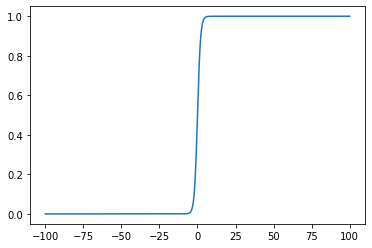

In [21]:

X = np.linspace(-100, 100, 20000)
sig = sigmoid(X)

plt.plot(X, sig);

## tanh


**tanh**: $f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

tanh a shifted version of the sigmoid. The inflection point passes through 0,0 instead of 0,.5, and the output is between -1 and 1.  This means the mean of the output is centered around 0, which can make learning in the next layer easier.  tanh is almost always better in a **hidden layer**. For the output layer, however, sigmoid makes sense for binary outcomes.  If we require an output of 0 or 1, it makes sense for the activation function to output between 0 and 1, rather than -1 and 1.

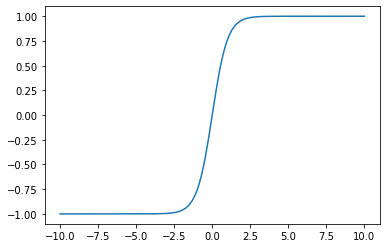

In [22]:
# Coding tanh:

X = np.linspace(-10, 10, 200)
y_tanh = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

plt.plot(X, y_tanh);

In [23]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [24]:
a = tanh(z)
a

array([[1.]])

One problem with tanh (and sigmoid), is that if our input is large, then the slope of the activation function flattens out.  When conducting backpropogation, we will use the derivative of the activation function as one of our terms multiplied by a learning rate to determine how big a step to take when adjusting our weights.  If our derivative is close to zero, the step will be very small, so the speed of our learning will be very slow, which is a huge problem.  This is called the **vanishing gradient** problem.

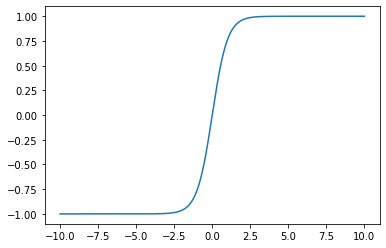

In [25]:
X = np.linspace(-10, 10, 2000)
y_tanh = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

plt.plot(X, y_tanh);

# ReLU

ReLU, or rectified linear unit, outputs 0 for negative numbers, and the original value for positive inputs.  

**ReLU**: $f(x) = 0$ if $x\leq 0$; $f(x) = x$ otherwise

ReLU is a commonly used and effective activation function because of speed.  Given that the output is zero when negative, some nodes become inactive (i.e. produce an output of 0).  Zero outputs take little computational power. Also, the constant gradient leads to faster processing speed in comparison to sigmoid and tanh, which come close to 0 with large positve and negative values. 

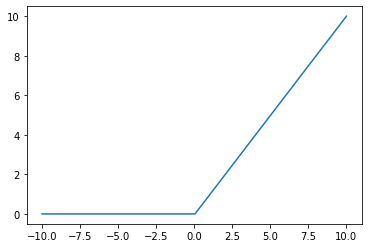

In [26]:
# Coding ReLU:

X = np.linspace(-10, 10, 200)

y_relu = list(np.zeros(100))
y_relu.extend(np.linspace(0, 10, 100))

plt.plot(X, y_relu);

In [27]:
def relu(z):
    if z <= 0:
        return 0
    else:
        return z

In [28]:
a = relu(z)
a

array([[17.90492741]])

Notice that ReLU ("Rectified Linear Unit") increases without bound as $x\rightarrow\infty$. The advantages and drawbacks of this are discussed on [this page on stackexchange](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks)

There are many activation functions, [see here](https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a). 

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very **densely**.

Our nodes will be taking in input from multiple sources. Let's add the entire training set as our input. 


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42, test_size=.2)
X_train.shape

(1437, 64)

Numpy allows us to easily calculate the predictions for the set of data:

In [30]:
X_train.shape

(1437, 64)

In [31]:
# Question: What dimension should our weight vector now be?

In [33]:
w.shape

(64, 1)

In [34]:
# Question: What should be the dimension of our collector function be?

In [36]:
z_0 = X_train.dot(w)+b
z_0.shape

(1437, 1)

In [37]:
a_0 = sigmoid(z_0)
a_0

array([[0.99999993],
       [0.99999997],
       [0.99999999],
       ...,
       [1.        ],
       [0.99999999],
       [0.99999975]])

In [38]:
a_0_relu = [relu(z_0) for z_0 in z_0]
a_0_relu[:10]

[array([16.44606955]),
 array([17.28505728]),
 array([18.46683301]),
 array([19.79842615]),
 array([17.13103811]),
 array([22.17275445]),
 array([18.71691319]),
 array([20.02190363]),
 array([20.04801211]),
 array([16.99987808])]

For our DS purposes, we'll generally imagine our network to consist of only a few layers, including an input layer (where we feed in our data) an output layer (comprising our predictions). Significantly, there will also (generally) be one or more layers of neurons between input and output, called **hidden layers**.

One reason these are named hidden layers is that what their output actually represents in not really known.  The activation of node 1 of the first hidden layer may represent a sequence of pixel intensity corresponding to a horizontal line, or a group of dark pixels in the middle of a number's loop. 

![dense](img/Deeper_network.jpg)

Because we are unaware of how exactly these hidden layers are operating, neural networks are considered **black box** algorithms.  You will not be able to gain much inferential insight from a neural net.

Let's add **one** hidden layer to our network with **four** nodes.

Each of our pixels from our digit representation goes to each of our nodes, and each node has a set of weights and a bias term associated with it.



In [39]:
# Question: what should the dimensions of our weight matrix be?

In [41]:
w_1 = np.random.normal(0,.1, (X_train.shape[1],4))
w_1.shape

(64, 4)

In [42]:
b_1 = 0

In [43]:
z_1 = X_train.dot(w_1) + b_1
z_1

array([[-3.43751327, -3.42955313, -5.76666396, -0.50931585],
       [-5.13741177, -3.45879186,  0.37718496, -3.96348206],
       [-3.40506893, -8.87931244, -4.30409105, -4.50740448],
       ...,
       [-5.92769122, -6.64483028, -2.56269359, -1.06600505],
       [-3.40466876, -7.09420073, -0.88596371, -5.72753492],
       [-6.49955199, -2.76260529, -3.02222097, -7.74918084]])

In [44]:
a_1 = sigmoid(z_1)
a_1

array([[3.11434300e-02, 3.13845140e-02, 3.12041506e-03, 3.75353919e-01],
       [5.83858116e-03, 3.05077461e-02, 5.93193970e-01, 1.86426982e-02],
       [3.21374232e-02, 1.39220483e-04, 1.33329918e-02, 1.09067745e-02],
       ...,
       [2.65754556e-03, 1.29903947e-03, 7.15783335e-02, 2.56163555e-01],
       [3.21498725e-02, 8.29215665e-04, 2.91943477e-01, 3.24453017e-03],
       [1.50185394e-03, 5.93786859e-02, 4.64320395e-02, 4.30909767e-04]])

Now each of these neurons has a set of weights and a bias associated with it.

### What is the shape of this weight matrix?

In [46]:
w_1 = np.random.normal(0,.1, (a_1.shape[1],1))

w_1.shape

(4, 1)

In [47]:
b_1 = 0

In [48]:
z_1 = a_1.dot(w_1)

In [49]:
output = sigmoid(z_1)
y_pred = output > .5
y_hat = y_pred.astype(int)
y_hat[:5]

array([[0],
       [0],
       [1],
       [0],
       [1]])

## Model Training

![toomuch](img/much-data-too-much-data.jpg)

Unlike other models that can take all the data in the training set, neural nets generally don't accept the entire dataset all at once. Thus we often want to specify a *batch size*, which will break our data up into chunks of that size.

Example: $ 2,000$ data points, _batch size_ **500**

# Loss Function

Our loss function is associated with the nature of our output.

In logistic regression, our output was binary, so our cost function was the negative loglikelihood, aka cross-entropy.

$$ \Large -\ loglikelihood = -\frac{1}{m} * \sum\limits_{i=1}^m y_i\log{p_i} + (1-y_i)\log(1-p_i) $$
    

In [53]:
y_train = y_train %2 

In [54]:
y_train*np.log(output) + (1-y_train) * np.log(1-output)

array([[-0.69038107, -0.69038107, -0.69038107, ..., -0.69038107,
        -0.69592097, -0.69592097],
       [-0.67929836, -0.67929836, -0.67929836, ..., -0.67929836,
        -0.70719049, -0.70719049],
       [-0.69377312, -0.69377312, -0.69377312, ..., -0.69377312,
        -0.69252164, -0.69252164],
       ...,
       [-0.68853084, -0.68853084, -0.68853084, ..., -0.68853084,
        -0.69778493, -0.69778493],
       [-0.68706317, -0.68706317, -0.68706317, ..., -0.68706317,
        -0.69926843, -0.69926843],
       [-0.69326499, -0.69326499, -0.69326499, ..., -0.69326499,
        -0.69302939, -0.69302939]])

In [55]:
neg_ll = -1/len(y_train)*np.sum(y_train*np.log(output) + (1-y_train) * np.log(1-output))
neg_ll

996.0970920824844

We pass the our data through the network, and calculate the loss function according to the nature of the output.  

Here is a good summary of different [loss functions]( https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html):
   

When we train our models with Keras, we will watch the loss function's progress across epochs.  A decreasing loss function will show us that our model is **improving**.

## Back propagation

Moreover, neural nets are dynamic in the sense that, after a certain number of data points have been passed through the model, the weights will be *updated* with an eye toward optimizing our loss function. (Thinking back to biological neurons, this is like revising their activation potentials.) Typically, this is  done  by using some version of gradient descent.

![bprop](img/BackProp_web.png)

The graphic below can be a bit frustrating since it moves fast, but follow the progress as so:

Forward propogation with the blue tinted arrows computes the output of each layer: i.e. a summation and activation.

Backprop calculates the partial derivative (green circles) for each weight (brown line) and bias.

Then the optimizer multiplies a learning rate to each partial derivative to calculate a new weight which will be applied to the next batch that passes through.

![backprop](img/ff-bb.gif)

With logistic activation we use **cross entropy** (negative loglikelihood) as our loss function.

For each weight and beta, we calculate the partial derivative of the loss function with regard to that weight.

For a deep dive into the fitting process, reference Chapter 11 in [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)

Given that we are only passing *some* data points through at any one time, the question of *when* to update the weights becomes pressing. Standardly, we'd wait until we've passed all the data through before updating, but we might try updating after each batch ("batch gradient descent") or even after each point ("stochastic gradient descent"). [This post](https://datascience.stackexchange.com/questions/27421/when-are-weights-updated-in-cnn) has more details.

To be clear, backpropogation calculates the gradient for each weight and bias, in each layer, including the input layer, for each batch.

Good [resource](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/) on backpropogation with RMSE loss function.

# Optimizers

One of the levers we can tweek are the optimizers which control how the weights and biases are updated.

For stochastic gradient descent, the weights are updated with a constant learning rate (alpha) after every record.  If we specify a batch size, the constant learning rate is multiplied by the gradient across the batch. 

Other optimizers, such as Adam (not an acronym) adapts the learning rate to each parameter. 

[This article](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) has a nice discussion of Adam.

For the mathematical details, check out [this post](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).

To be clear, the optimizer multiplies the learning rate by the gradient and subtracts it from the original parameter value after each batch.

## Model Training - epochs
![epock](img/2014-10-28_anthropocene.png)

When all four batches of 500 observations go through the NN, one **epoch** is completed. 


Generally speaking, one epoch is NOT enough to see significant error reduction. But, because of the power of gradient descent, there are often very significant strides  made after a few tens or hundreds of epochs.

If you would like to continue the analogy of the brain, the neurons have evolved to incorporate new relationships between them.  The network has adapted to the stimulus via adjusted weights and biases.  The network has learned that certain relationships are not useful to the job at hand.  Certain parts of the brain grow, certain parts atrophy.  

By the late epoch, the network has evolved so that the neuronal connections are suited to the problem at hand.  